In [1]:
install.packages("rpart.plot", repos='http://cran.us.r-project.org')
install.packages("rpart", repos='http://cran.us.r-project.org')
library("rpart.plot")
library("rpart")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: rpart



In [2]:
irisData = read.csv("Iris.csv",header=TRUE)
print(head(irisData))
#Data preprocessing
irisData = irisData[,-c(1)]
print(head(irisData))
summary(irisData)
dim(irisData)

  Id SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm     Species
1  1           5.1          3.5           1.4          0.2 Iris-setosa
2  2           4.9          3.0           1.4          0.2 Iris-setosa
3  3           4.7          3.2           1.3          0.2 Iris-setosa
4  4           4.6          3.1           1.5          0.2 Iris-setosa
5  5           5.0          3.6           1.4          0.2 Iris-setosa
6  6           5.4          3.9           1.7          0.4 Iris-setosa
  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm     Species
1           5.1          3.5           1.4          0.2 Iris-setosa
2           4.9          3.0           1.4          0.2 Iris-setosa
3           4.7          3.2           1.3          0.2 Iris-setosa
4           4.6          3.1           1.5          0.2 Iris-setosa
5           5.0          3.6           1.4          0.2 Iris-setosa
6           5.4          3.9           1.7          0.4 Iris-setosa


 SepalLengthCm    SepalWidthCm   PetalLengthCm    PetalWidthCm  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
            Species  
 Iris-setosa    :50  
 Iris-versicolor:50  
 Iris-virginica :50  
                     
                     
                     

[1] 150   5

In [3]:
#Spliting dataset
ind = sample(2,nrow(irisData),replace=TRUE,prob=c(0.90,0.10))
traindata = irisData[ind==1,]
testdata = irisData[ind==2,]
print(dim(traindata))
print(dim(testdata))

[1] 139   5
[1] 11  5


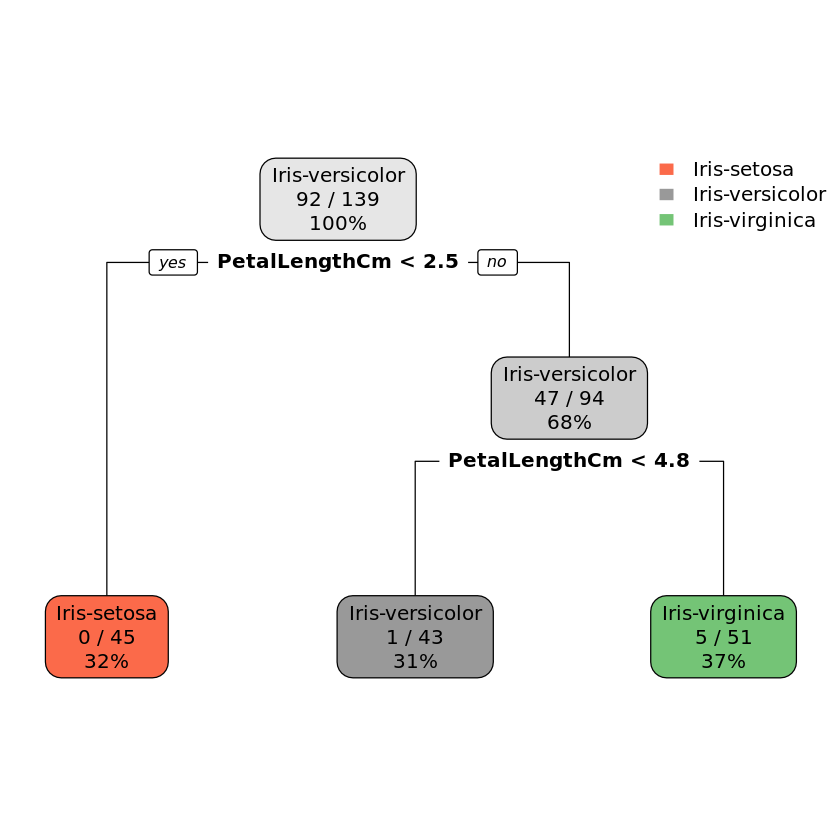

In [11]:
#DT = ctree(Species~.,data=traindata)
#plot(DT)
DT <- rpart(Species~., data = traindata, method = 'class')
rpart.plot(DT, extra = 103)

In [8]:
#validation
testpred = predict(DT,newdata=testdata,type='class')
print(testpred)
confusionmatrix = table(testpred,testdata$Species)
print(confusionmatrix)
accuracy = (sum(diag(confusionmatrix))/sum(confusionmatrix))*100
print(accuracy)

              3              21              28              29              41 
    Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa 
             58              77              95             126             127 
Iris-versicolor  Iris-virginica Iris-versicolor  Iris-virginica  Iris-virginica 
            150 
 Iris-virginica 
Levels: Iris-setosa Iris-versicolor Iris-virginica
                 
testpred          Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa               5               0              0
  Iris-versicolor           0               2              0
  Iris-virginica            0               1              3
[1] 90.90909


In [9]:
#Prediction
x = data.frame(SepalLengthCm=5.1,SepalWidthCm=3.4,PetalLengthCm=1.4,PetalWidthCm=2.0)
x_species = predict(DT,x)
print(x_species)

  Iris-setosa Iris-versicolor Iris-virginica
1           1               0              0
